In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, plot_confusion_matrix, roc_curve
# import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
df = pd.read_csv('BankChurners.csv')

df.head().style.set_properties(**{"background-color": "#54BAB9","color": "black",
                                     "border-color": "black","font-size":"10pt",'width': 200})

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000,0.000022,0.999980


#Data Analysis

In [ ]:
print(df.shape)


(10127, 23)


In [ ]:
df = df.iloc[:,1:-2]

In [ ]:
round((df.isnull().sum() * 100)/(df.shape[0]),2)

Attrition_Flag              0.0
Customer_Age                0.0
Gender                      0.0
Dependent_count             0.0
Education_Level             0.0
Marital_Status              0.0
Income_Category             0.0
Card_Category               0.0
Months_on_book              0.0
Total_Relationship_Count    0.0
Months_Inactive_12_mon      0.0
Contacts_Count_12_mon       0.0
Credit_Limit                0.0
Total_Revolving_Bal         0.0
Avg_Open_To_Buy             0.0
Total_Amt_Chng_Q4_Q1        0.0
Total_Trans_Amt             0.0
Total_Trans_Ct              0.0
Total_Ct_Chng_Q4_Q1         0.0
Avg_Utilization_Ratio       0.0
dtype: float64

In [ ]:
df.describe().T.style.bar(
    subset=['mean'],
    color='lightsalmon').background_gradient(
    subset=['std'], cmap='plasma').background_gradient(subset=['75%'], cmap='plasma').background_gradient(
    subset=['max'], cmap='plasma')

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.000000,46.325960,8.016814,26.000000,41.000000,46.000000,52.000000,73.000000
Dependent_count,10127.000000,2.346203,1.298908,0.000000,1.000000,2.000000,3.000000,5.000000
Months_on_book,10127.000000,35.928409,7.986416,13.000000,31.000000,36.000000,40.000000,56.000000
Total_Relationship_Count,10127.000000,3.812580,1.554408,1.000000,3.000000,4.000000,5.000000,6.000000
Months_Inactive_12_mon,10127.000000,2.341167,1.010622,0.000000,2.000000,2.000000,3.000000,6.000000
Contacts_Count_12_mon,10127.000000,2.455317,1.106225,0.000000,2.000000,2.000000,3.000000,6.000000
Credit_Limit,10127.000000,8631.953698,9088.776650,1438.300000,2555.000000,4549.000000,11067.500000,34516.000000
Total_Revolving_Bal,10127.000000,1162.814061,814.987335,0.000000,359.000000,1276.000000,1784.000000,2517.000000
Avg_Open_To_Buy,10127.000000,7469.139637,9090.685324,3.000000,1324.500000,3474.000000,9859.000000,34516.000000
Total_Amt_Chng_Q4_Q1,10127.000000,0.759941,0.219207,0.000000,0.631000,0.736000,0.859000,3.397000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

#Data Manipulation

In [ ]:
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

#Data Visualization

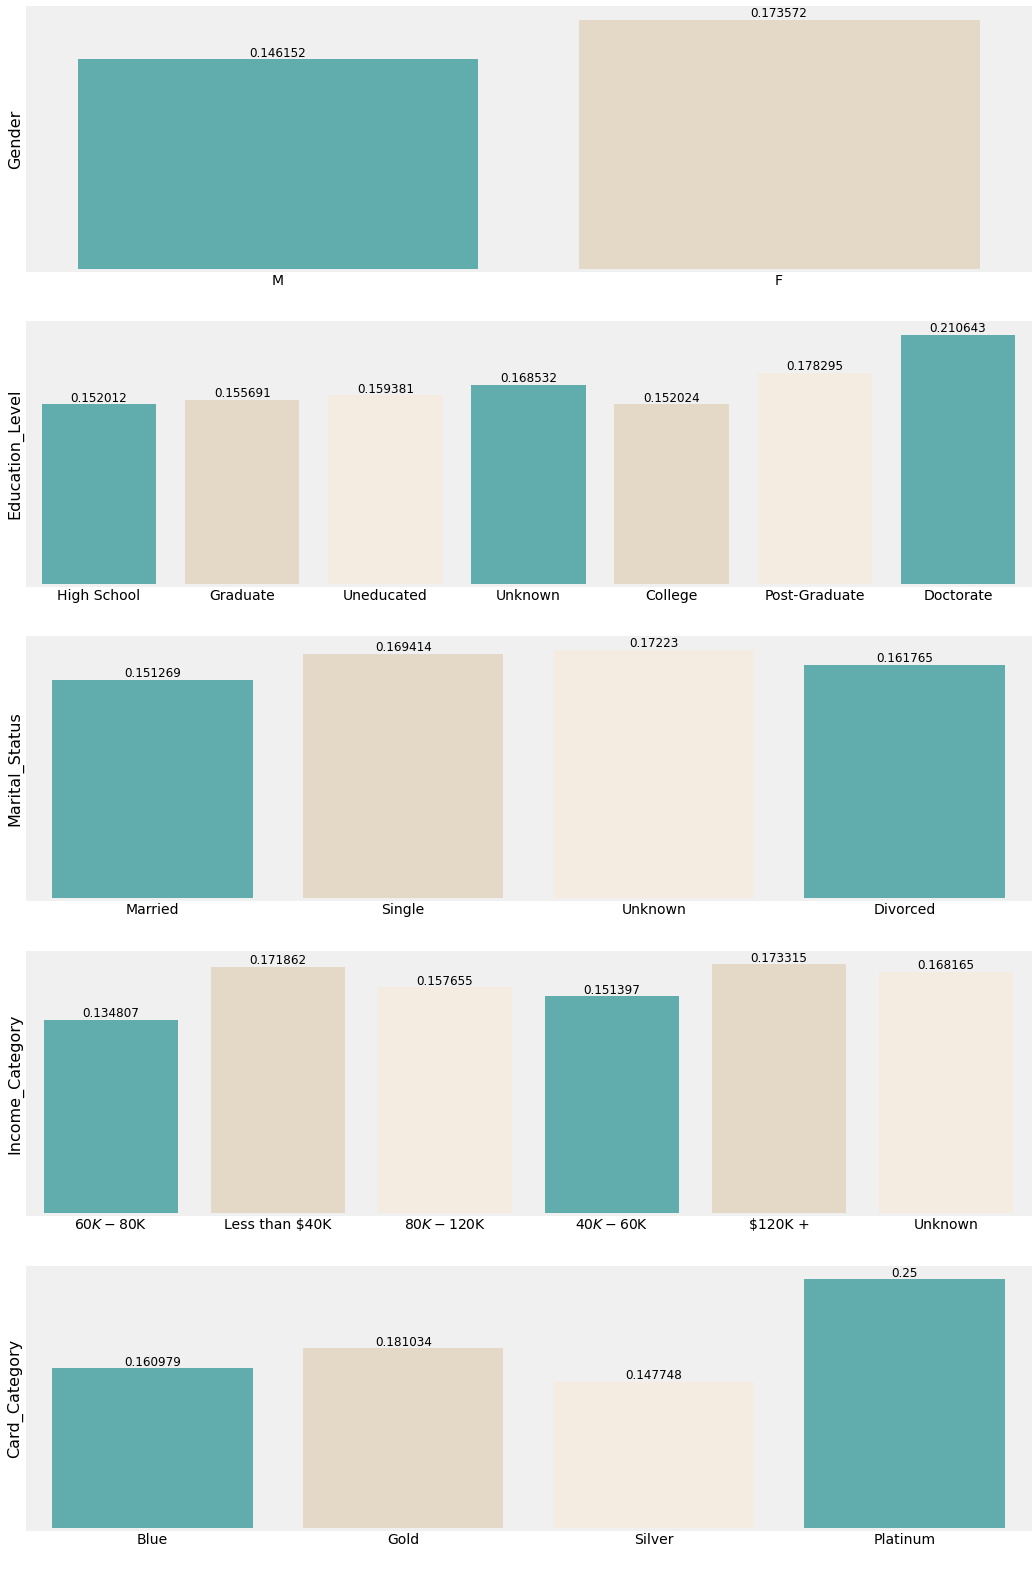

In [ ]:
num_cols = list(df.select_dtypes(["int64","float64"]))
cat_cols = list(df.select_dtypes("object"))

fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(16, 28))

i = 0 #counter

for cols in cat_cols:

    sns.barplot(x=df[cols], y=df['Attrition_Flag'], fill=True, alpha=1, ci=None, ax=ax[i], palette=('#54BAB9', '#E9DAC1','#F7ECDE'))

    ax[i].set_xlabel(' ')
    ax[i].set_xlabel(' ')
    ax[i].set_ylabel(' ')
    ax[i].xaxis.set_tick_params(labelsize=14)
    ax[i].tick_params(left=False, labelleft=False)
    ax[i].set_ylabel(cols, fontsize=16)
    ax[i].bar_label(ax[i].containers[0], size="12")
    ax[i].grid(False)
    i=i+1


plt.show()

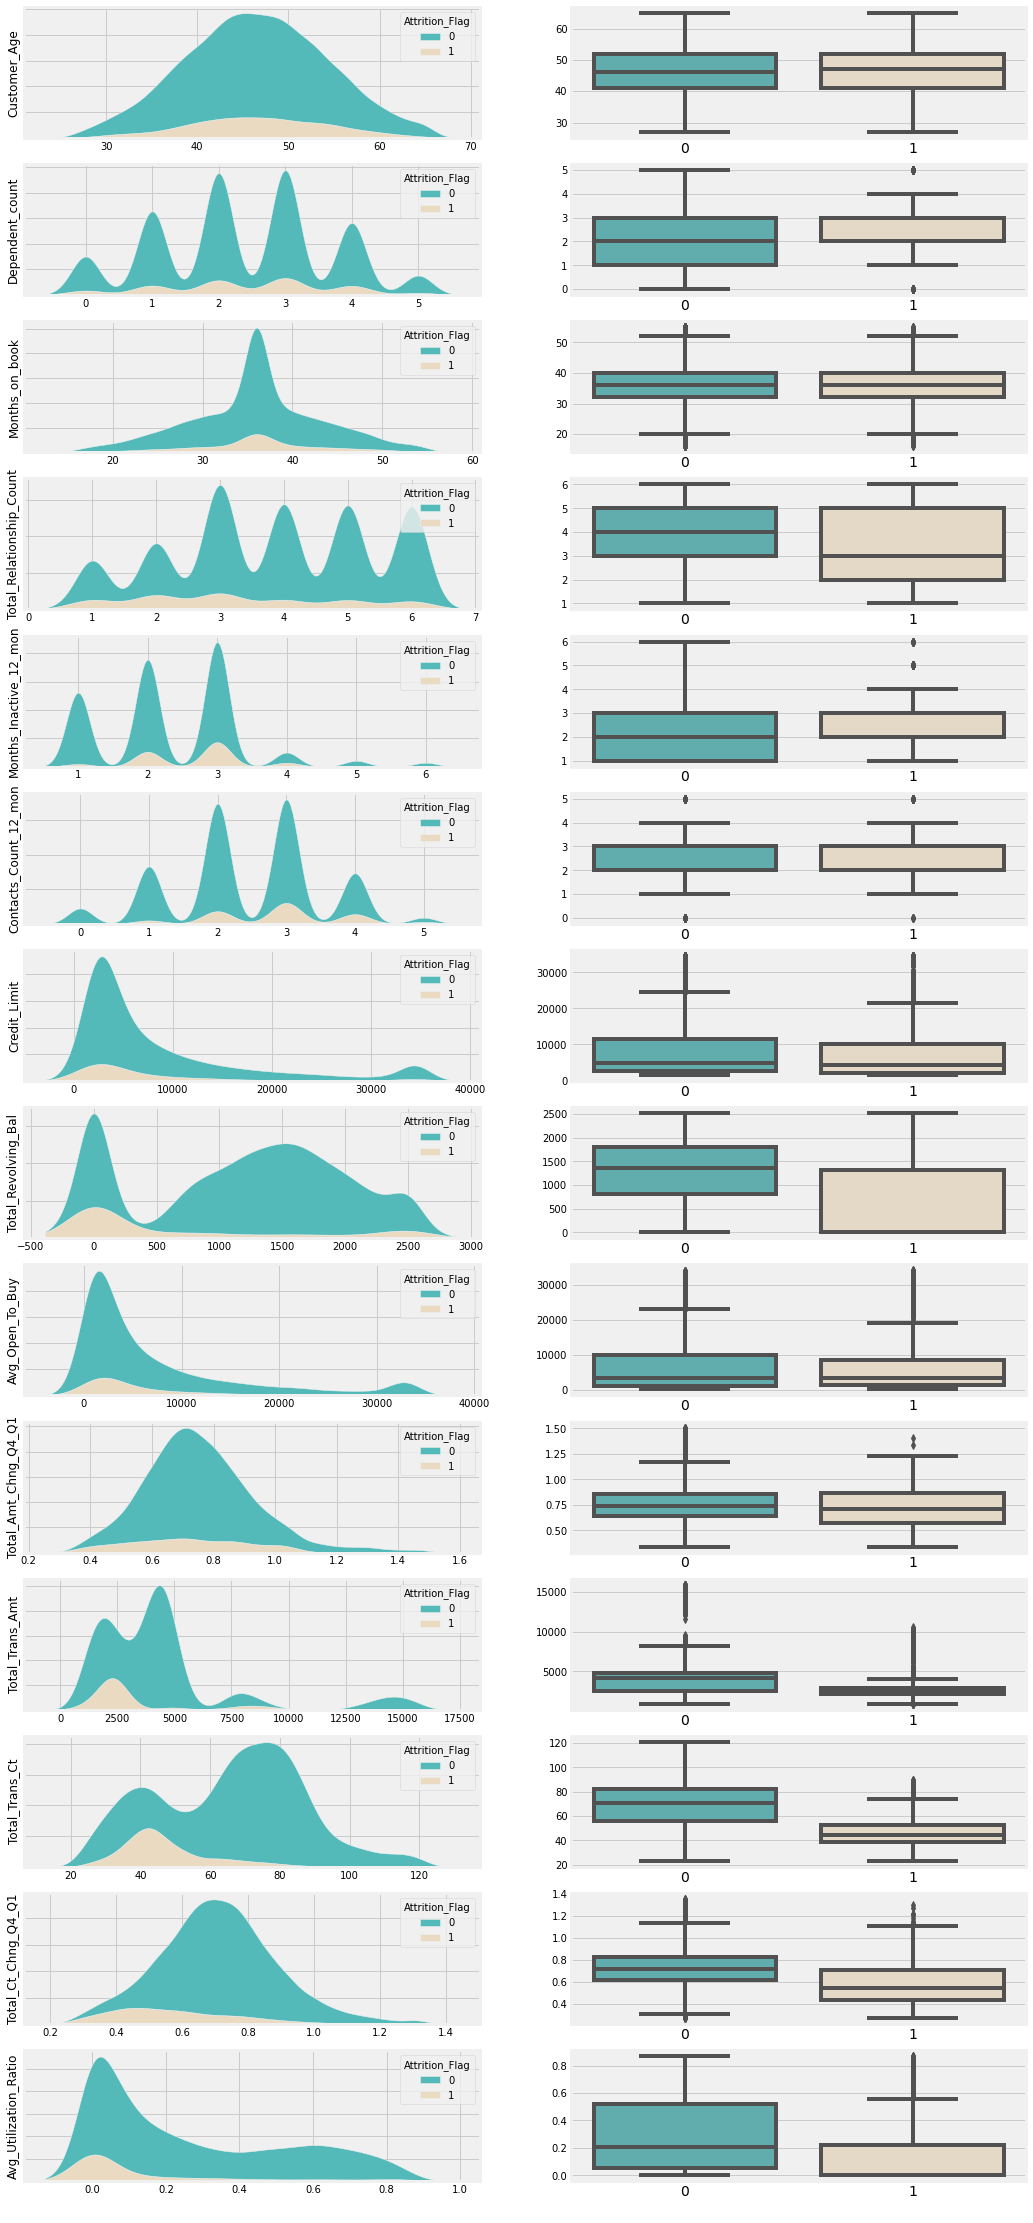

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=14, figsize=(16, 40))

i = 0 #counter
for cols in num_cols[1:]:

    # Removing Outliers
    Q3 = df[cols].quantile(0.99)
    df = df[df[cols] <= Q3]
    Q1 = df[cols].quantile(0.01)
    df = df[df[cols] >= Q1]

    sns.kdeplot(df[cols], fill=True, alpha=1, hue = df['Attrition_Flag'],
                palette=('#54BAB9', '#E9DAC1'), multiple='stack', ax=ax[i,0])

    sns.boxplot(data= df, y=cols, x='Attrition_Flag', ax=ax[i, 1],
               palette=('#54BAB9', '#E9DAC1'), color='white')
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    ax[i,0].tick_params(left=False, labelleft=False)
    ax[i,0].set_ylabel(cols, fontsize=12)
    i=i+1

plt.show()

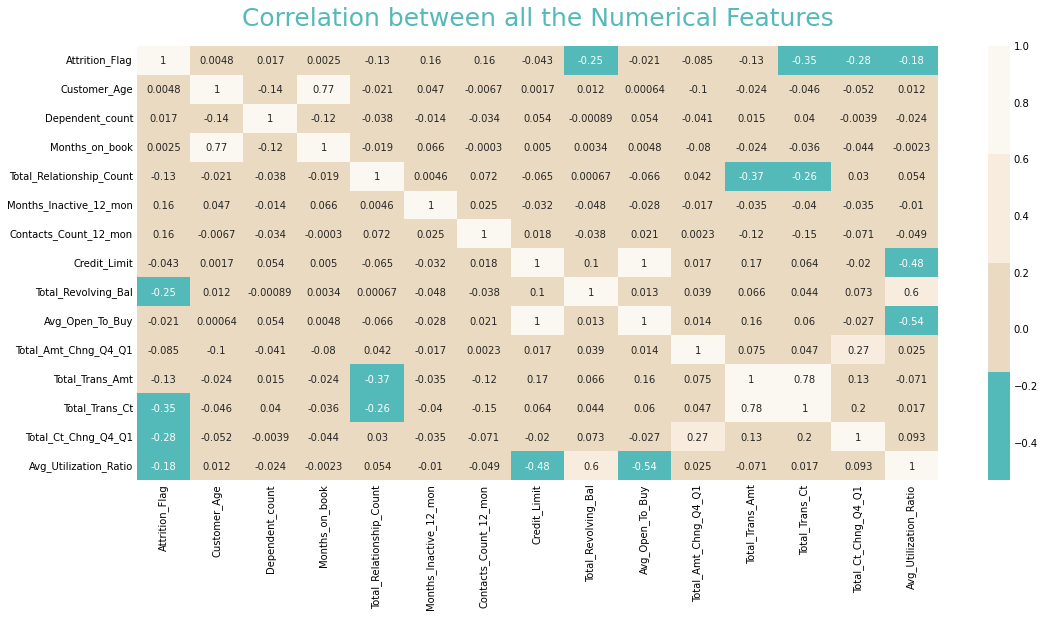

In [ ]:
heat = df.corr()
plt.figure(figsize=[16,8])
plt.title("Correlation between all the Numerical Features", size=25, pad=20, color='#54BAB9')
sns.heatmap(heat, cmap=['#54BAB9', '#E9DAC1','#F7ECDE','#FBF8F1'], annot=True)
plt.show()

#Data Balancing

In [ ]:
for col in cat_cols:
    dummy_cols = pd.get_dummies(df[col], drop_first=True, prefix=col)
    df = pd.concat([df,dummy_cols],axis=1)
    df.drop(columns=col, inplace=True)

In [ ]:
y = df.pop("Attrition_Flag")
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=69)

In [ ]:
req_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
            'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio']

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train[req_cols])

X_test = scaler.transform(X_test[req_cols])

In [ ]:
sm = SMOTE(random_state = 69, sampling_strategy = 1.0)

X_train, y_train = sm.fit_resample(X_train, y_train)

#Data Modeling

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=69, use_label_encoder=False, n_jobs=-1)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=69, ...)

In [ ]:
# XGBoost Score on the test data

xgb_model.score(X_test, y_test)

0.9754846066134549

In [ ]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1540
           1       0.90      0.90      0.90       214

    accuracy                           0.98      1754
   macro avg       0.94      0.94      0.94      1754
weighted avg       0.98      0.98      0.98      1754

